GOLD PRICE PREDICTION

Importing the Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

Data Collection and Processing

In [27]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [28]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [30]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [31]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [32]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [33]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Text(0.5, 1.0, 'Gold Price')

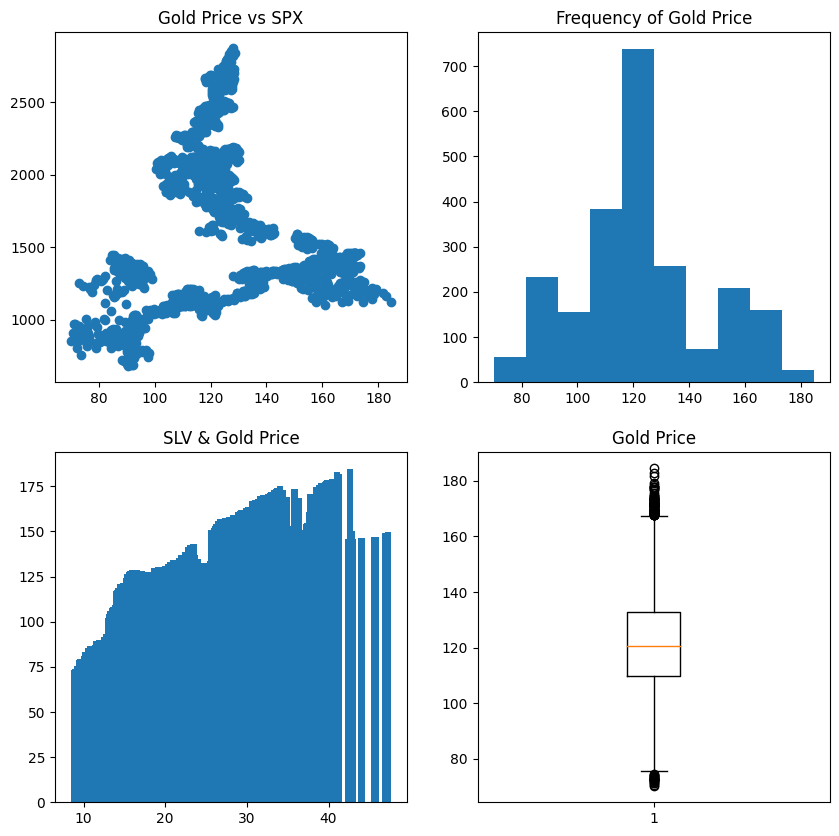

In [34]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.scatter(gold_data["GLD"], gold_data["SPX"])
plt.title("Gold Price vs SPX")

plt.subplot(2,2,2)
plt.hist(gold_data["GLD"])
plt.title("Frequency of Gold Price")

plt.subplot(2,2,3)
plt.bar(gold_data["SLV"], gold_data["GLD"] )
plt.title("SLV & Gold Price")

plt.subplot(2,2,4)
plt.boxplot(gold_data["GLD"] )
plt.title("Gold Price")

Correlation:


In [35]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

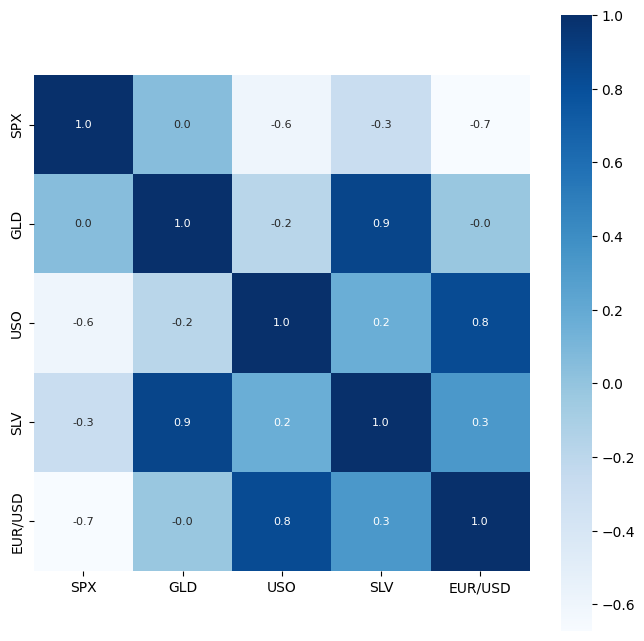

In [36]:
#heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [37]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/49/chg7q75x29xgd8hd3px9j90r0000gn/T/ipykernel_38942/563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

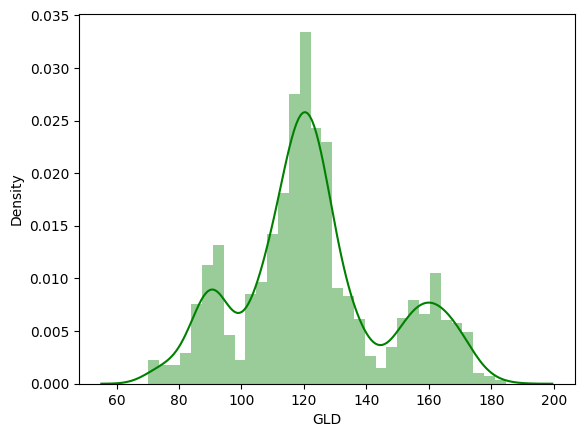

In [38]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

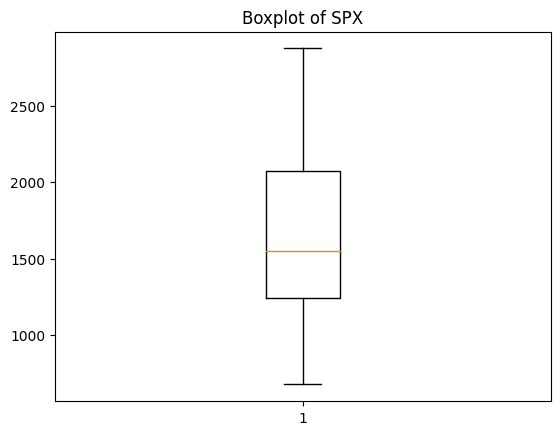

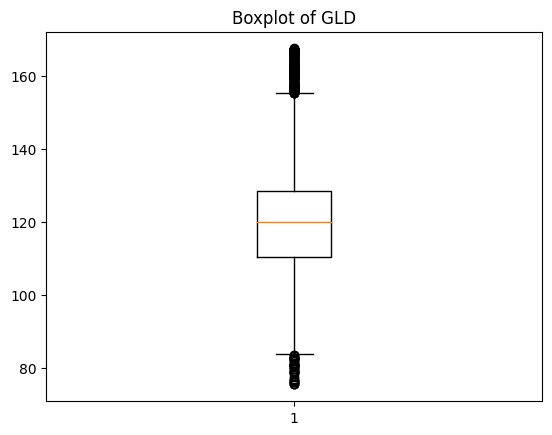

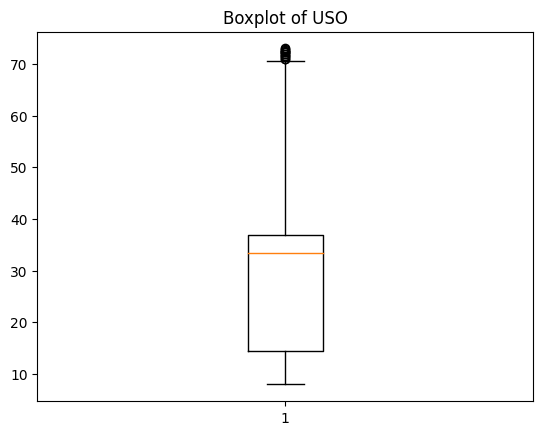

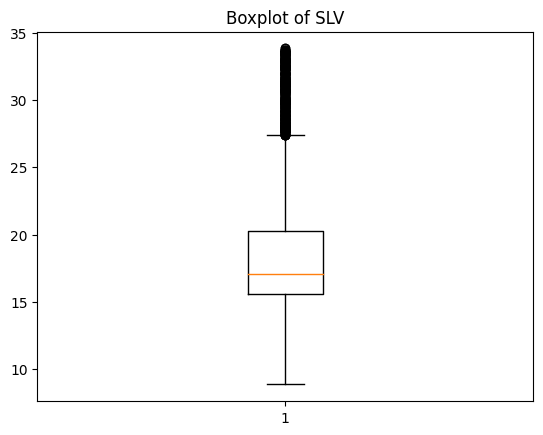

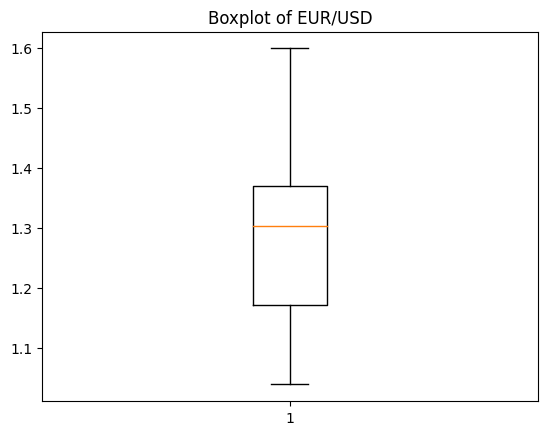

In [51]:
# # Function to handle outliers using box plot method
# def handle_outliers(data, column):
#     q = list(data[column].quantile([0.0, 0.25, 0.50, 0.75, 1]))
#     IQR = q[3] - q[1]
#     LIF = q[1] - 1.5 * IQR
#     UIF = q[3] + 1.5 * IQR
#     Inside = data[(data[column] >= LIF) & (data[column] <= UIF)]
#     Outside = data[(data[column] < LIF) | (data[column] > UIF)]
#     Outside.loc[:, column] = Inside[column].median()
#     return pd.concat([Inside, Outside], axis=0)

# # Handling outliers in the dataset
# for column in gold_data.columns:
#     if gold_data[column].dtype != 'object':
#         gold_data = handle_outliers(gold_data, column)

#         # Plotting boxplot after handling outliers
#         plt.figure()
#         plt.boxplot(gold_data[column].values)
#         plt.title(f'Boxplot of {column}')
#         plt.show()

Splitting the Features and Target

In [39]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [40]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Linear Regressor

In [43]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
linear_predictions = linear_regressor.predict(X_test)
linear_r2_score = metrics.r2_score(Y_test, linear_predictions)
print("Linear Regression R squared error:", linear_r2_score)

Linear Regression R squared error: 0.8657886565869237


Model Training: k-Nearest Neighbors Regression

In [44]:
# K-Nearest Neighbors Regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)
knn_predictions = knn_regressor.predict(X_test)
knn_r2_score = metrics.r2_score(Y_test, knn_predictions)
print("KNN Regression R squared error:", knn_r2_score)

KNN Regression R squared error: 0.9338987197131254


Model Training:
Random Forest Regressor

In [45]:
# Random Forest Regression
random_forest_regressor = RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(X_train, Y_train)
random_forest_predictions = random_forest_regressor.predict(X_test)
random_forest_r2_score = metrics.r2_score(Y_test, random_forest_predictions)

Model Evaluation

In [46]:
# Plotting R-squared errors for comparison
models = ['Linear Regression', 'KNN Regression', 'Random Forest Regression']
r2_scores = [linear_r2_score, knn_r2_score, random_forest_r2_score]


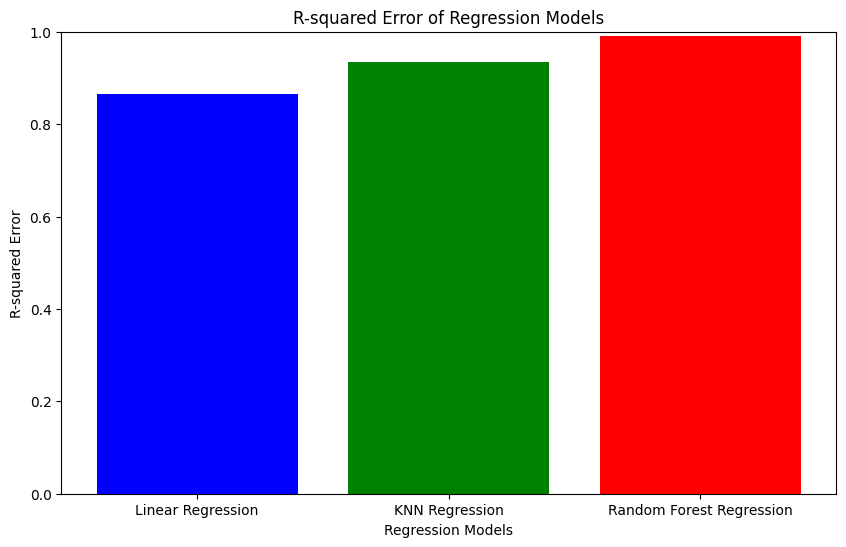

In [47]:

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Error')
plt.title('R-squared Error of Regression Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()


In [48]:
# Selecting the model with the highest R-squared error
best_model_index = np.argmax(r2_scores)
best_model = models[best_model_index]
print("Best Model:", best_model)

Best Model: Random Forest Regression


In [49]:
predictions = random_forest_regressor.predict(X_test)
print(predictions)


[168.83689947  82.16759968 115.86550001 127.75740048 120.75780128
 154.66489808 150.5356986  126.14319997 117.5569986  125.96440077
 116.61210112 171.63800081 141.84169833 167.87919799 115.0708003
 117.41720073 139.21860275 169.94160058 159.80710308 159.56889988
 155.17380027 125.58990009 176.1900994  156.74620348 125.15720028
  93.70099963  77.32300017 120.86429997 119.17149969 167.43769973
  88.09270027 125.28310076  90.97250082 117.78429997 120.9452995
 136.46550116 115.32330103 115.59700092 147.7860001  107.15500077
 104.33820241  87.12169787 126.40070066 118.05089981 152.56639927
 119.70150025 108.37369947 108.23149868  93.16910059 127.14109759
  75.05350035 113.64329924 121.36060015 111.16249904 118.84829899
 120.71689909 159.37460045 166.96110183 146.91549664  85.81719876
  94.3495001   86.84679895  90.60399998 118.85610105 126.54850063
 127.66550034 169.14160054 122.32999947 117.46259886  98.5760004
 168.4362021  142.89199794 132.01350234 121.2487023  121.06889927
 119.6637007 

In [50]:
user_input = []
for feature in X.columns:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)

user_input = np.array(user_input).reshape(1, -1)
user_prediction = random_forest_regressor.predict(user_input)
print("Predicted value:", user_prediction[0])

ValueError: could not convert string to float: ''

In [ ]:
# linear_r2_score = r2_score(Y_test, linear_predictions)
# num_predictors = X_train.shape[1] 
# num_samples = len(Y_test)
# adjusted_r2_score = 1 - (1 - linear_r2_score) * (num_samples - 1) / (num_samples - num_predictors - 1)
# print("Adjusted R squared error:", adjusted_r2_score)
